# 1. Ensemble Methods
- Ensemble methods are techniques that create multiple models and then combine them to produce improved results.
- Ensemble methods usually produces more accurate solutions than a single model would
- There are two Ensemble methods:
    - Bagging (Bootstrap Aggregating)
    - Boosting 

### A. Bagging Method
- BAGGing gets its name because it combines Bootstrapping and Aggregation to form one ensemble model.
- Given a sample of data, multiple bootstrapped subsamples are pulled. A Decision Tree is formed on each of the bootstrapped subsamples.
- After each subsample Decision Tree has been formed, an algorithm is used to aggregate over the Decision Trees to form the most efficient predictor.

- Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.
- Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.
    1. Multiple subsets are created from the original dataset, selecting observations with replacement.
    2. A base model (weak model) is created on each of these subsets.
    3. The models run in parallel and are independent of each other.
    4. The final predictions are determined by combining the predictions from all the models.

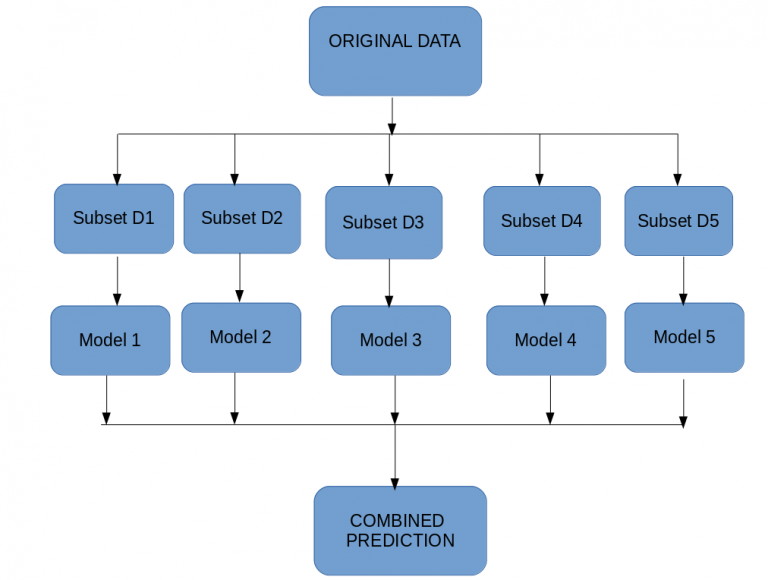

#### Layman's Example:
- Suppose we have to take a test and we decide to take little help from friends
- We will get each of our friends to answer the test separately and combine them using either averaging or voting

### B. Boosting Method

- The term “boosting” is used to describe a family of algorithms which are able to convert weak models to strong models.
- The model is weak if it has a substantial error rate, but the performance is not random (resulting in an error rate of 0.5 for binary classification).
- Boosting incrementally builds an ensemble by training each model with the same dataset but where the weights of instances are adjusted according to the error of the last prediction. The main idea is forcing the models to focus on the instances which are hard

- Gradient Boosting is basically about "boosting" many weak predictive models into a strong one, in the form of ensemble of weak models. Here, a weak predict model can be any model that works just a little better than random guess.
- To build the strong model, we need to find a good way to "combine" weak models.

#### Layman's Example:
- Suppose we have to take a test and we decide to take little help from friends
- We pick a particular friend to answer certain set of questions on the basis of expertise (weak learners) and keep doing
- Then, we will combine all them to a super smart friend who knows it all (Strong learner)

1. A subset is created from the original dataset.
2. Initially, all data points are given equal weights.
3. A base model is created on this subset.
4. This model is used to make predictions on the whole dataset.
5. Errors are calculated using the actual values and predicted values.
6. The observations which are incorrectly predicted, are given higher weights. 
7. Another model is created and predictions are made on the dataset. (This model tries to correct the errors from the previous model)
8. Similarly, multiple models are created, each correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the models (weak learners).

Thus, the boosting algorithm combines a number of weak learners to form a strong learner. The individual models would not perform well on the entire dataset, but they work well for some part of the dataset. Thus, each model actually boosts the performance of the ensemble

### Summary:
1. Bagging algorithms:

- Bagging meta-estimator
- Random forest
2. Boosting algorithms:

- AdaBoost
- GBM
- XGBM
- Light GBM
- CatBoost

# 2. AdaBoost

- Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”. Here are some (fun) facts about Adaboost!
    <br> → The weak learners in AdaBoost are decision trees with a single split, called decision stumps.
    <br> → AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.
    <br> → AdaBoost algorithms can be used for both classification and regression problem.

- In AdaBoost, arguably the most popular boosting algorithm, weak models are trained in an adaptive way (AdaBoost, and other boosting models, can be used for both classification and regression. Classification model is used here as an example):

1. Train a weak model m using data samples drawn according to some weight distribution
2. Increase the weight of samples that are misclassified by model m, and decrease the weight of samples that are classified correctly by model m
3. Train next weak model using samples drawn according to the updated weight distribution
4. In this way, the algorithm always trains models using data samples that are "difficult" to learn in previous rounds, which results an ensemble of models that are good at learning different "parts" of training data.

- Model 1: 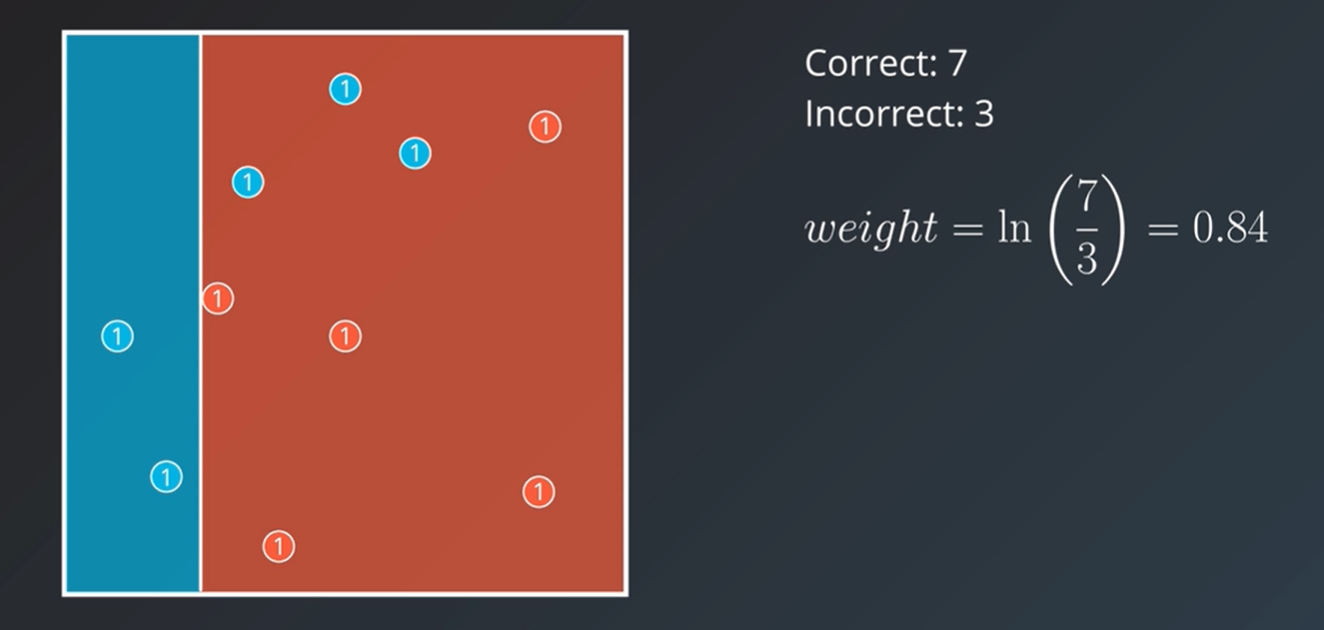

- We will increase the weights of the mis-classified points and build a new model.
- Weights of mis-classified points will be increased such that `number of correct = number of incorrects` i.e multiplying the weights by 7/3

- Model 2: 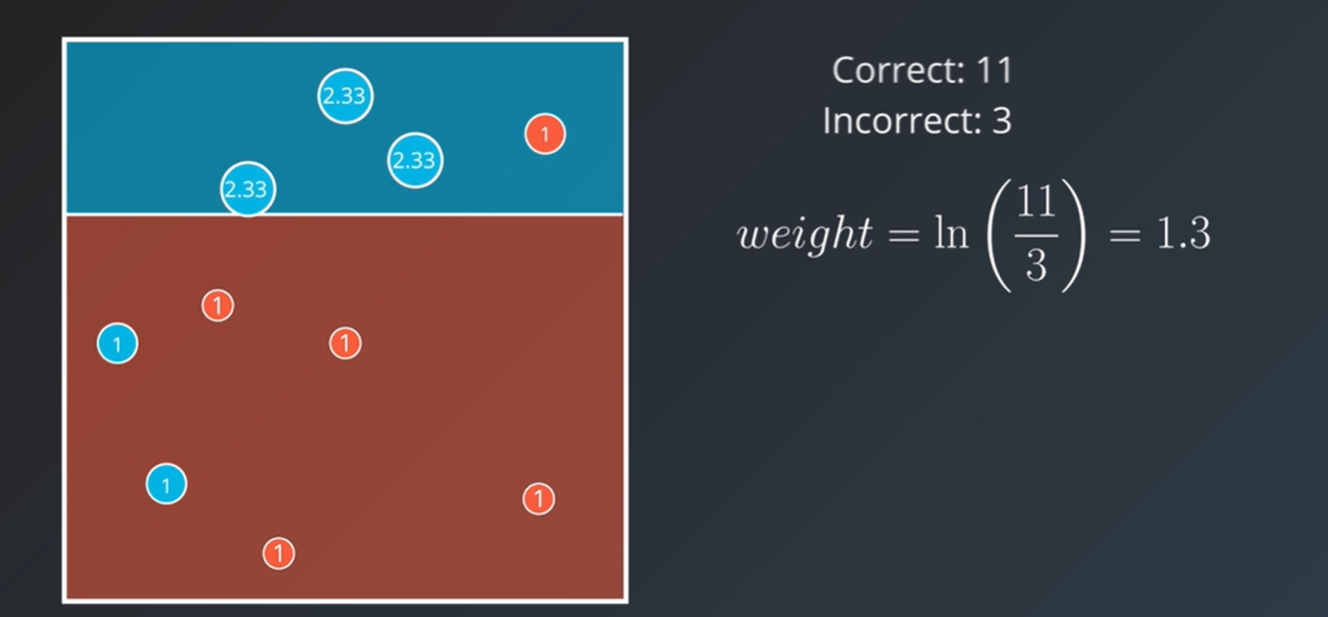

- We will increase the weights of the mis-classified points and build a new model.
- Weights of mis-classified 4 points will be increased such that `number of correct = number of incorrects` i.e multiplying the weights by 11/3

- Model 3: 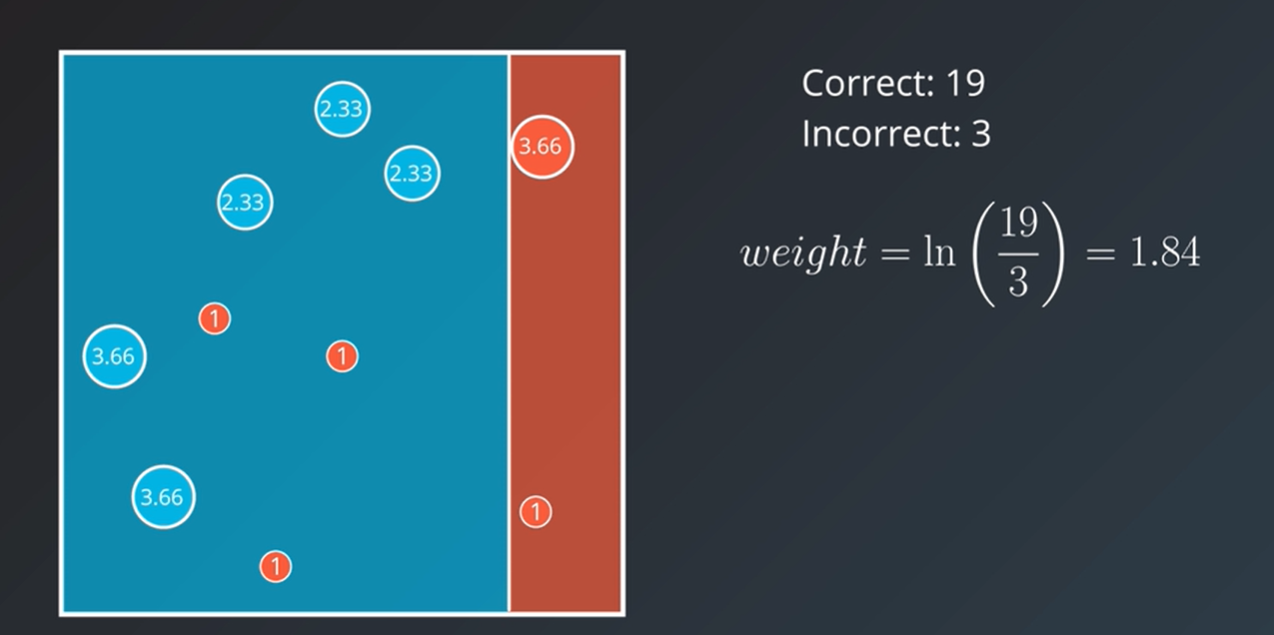

- We will increase the weights of the mis-classified points and build a new model.
- Weights of mis-classified 3 points will be increased such that `number of correct = number of incorrects` i.e multiplying the weights by 19/3, an so on

#### Now, combining all the weak learners to get to the strong learner

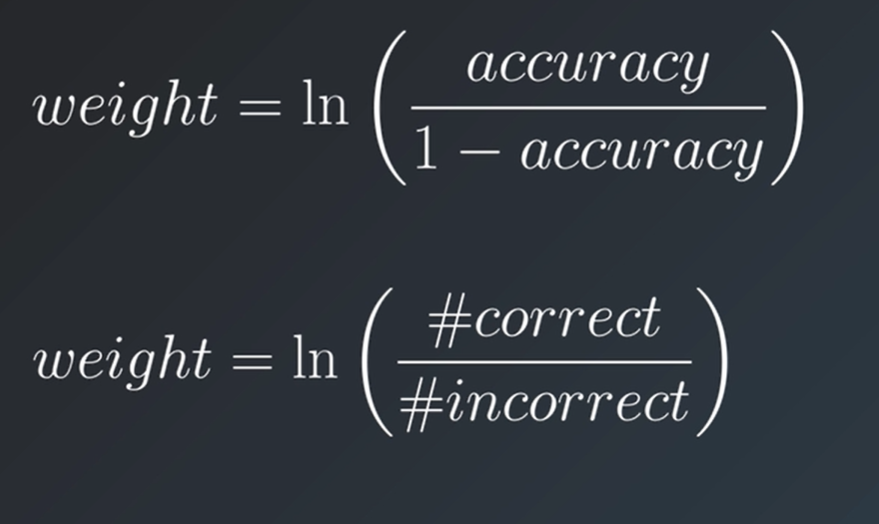

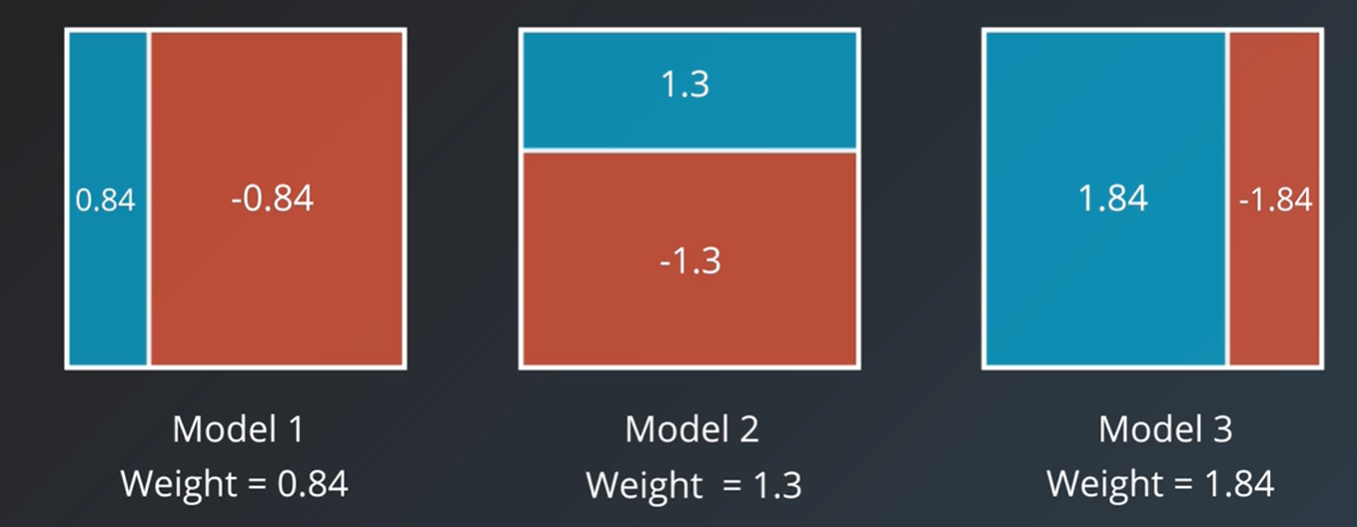

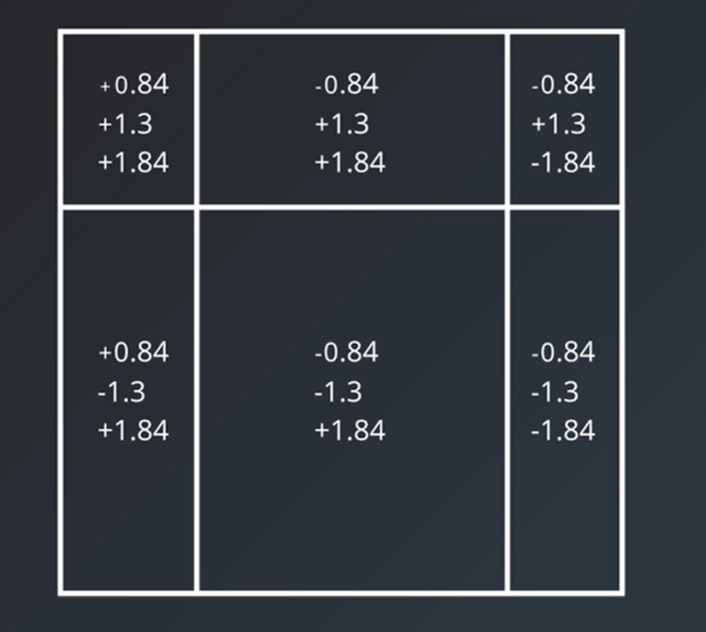

#### When the combined weight is positive, we say positive
#### When the combined weight is negative, we say negative

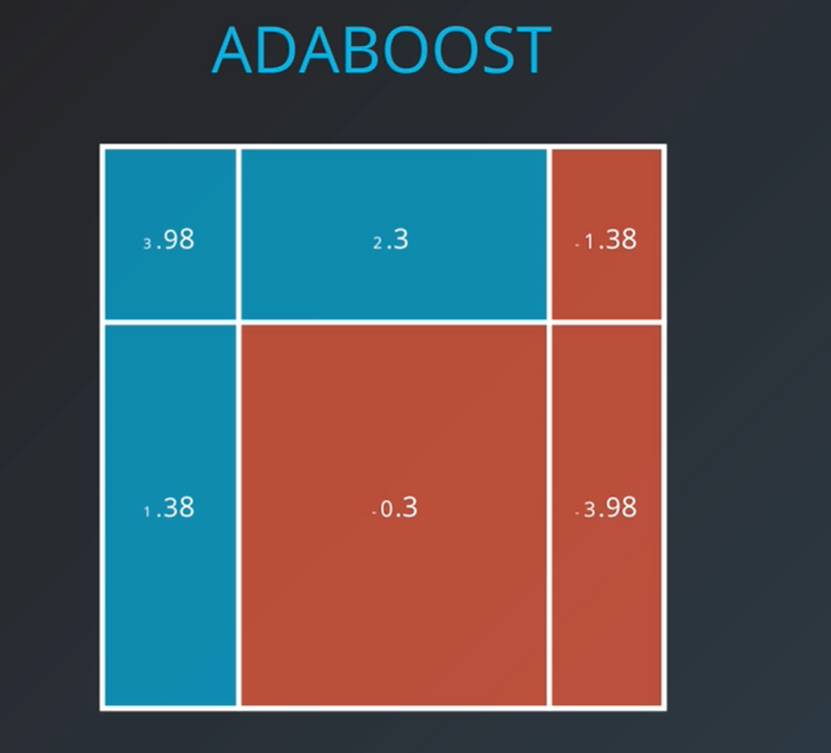

# 3. AdaBoost in sklearn

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
model.predict(x_test)

### Hyperparameters
- When we define the model, we can specify the hyperparameters. In practice, the most common ones are

1. __base_estimator__: The model utilized for the weak learners (Warning: Don't forget to import the model that you decide to use for the weak learner).
2. __n_estimators__: The maximum number of weak learners used.

- For example, here we define a model which uses decision trees of max_depth 2 as the weak learners, and it allows a maximum of 4 of them.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators = 4)
model.fit(x_train, y_train)
model.predict(x_test)